# *Netflix Movies and Shows Analysis*

#### Overview 

This project analyzes the Netflix Shows dataset to explore patterns in movies and TV shows available on the platform. By examining attributes such as genre, release year, country, and descriptions, the study highlights trends in global content and audience preferences. The project also connects these insights with public sentiment from external sources like social media and reviews, providing a deeper understanding of how viewers perceive and engage with Netflix content.


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## 1. Data Loading and Initial Overview

In [3]:
df = pd.read_csv("netflix_titles.csv")    #Loading dataset

In [4]:
#from IPython.display import FileLink
#df.to_csv("netflix_titles_duplicate.csv", index=False)

#### Describing the dataset 

In [5]:
df.head(5)   #first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.tail(5)   #Last  5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
#Dataset Shape
print("\tShape of the dataset\n","="*35)
print("Number of rows : ",df.shape[0])
print("\nNumber of coloumns : ",df.shape[1])

	Shape of the dataset
Number of rows :  8807

Number of coloumns :  12


In [8]:
#Columns Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
#datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
#statistical Summary
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### About Dataset

The dataset contains detailed information on Netflix movies and TV shows, including title, genre, cast, director, release year, and description. It offers a strong basis for analyzing content trends, regional distribution, and audience preferences over time.

## Data Cleaning and Preprocessing

In [13]:
#Removing Duplicate entries

df = df.drop_duplicates()

#displaying shape of dataset after removing duplicates 
print("\tShape of the dataset\n","="*35)
print("Number of rows : ",df.shape[0])
print("\nNumber of coloumns : ",df.shape[1])

	Shape of the dataset
Number of rows :  8807

Number of coloumns :  12


#### Handling Missing Entries

In [14]:
# Columns and Number of Missing entries

print("Number of missing values for each Column  \n","="*50,"\n",df.isna().sum())

Number of missing values for each Column  
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [15]:
## removing rows having missing values ,which not affect overall dataset

df.dropna(subset=["rating"] , inplace=True)  #removing rows where rating are missing, 4 rows removed , not affecting overall dataset
df.dropna(subset=["duration"] , inplace=True)  #removing rows where duration are missing, 3 rows removed , not affecting overall dataset

In [16]:
# Replacement of other missing values with appropriate values

df["director"].fillna("Unknown" , inplace=True)   #replaced with unknown
df["cast"].fillna("Unknown" , inplace=True)
df["country"] = df.groupby("director")["country"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))  #replaced mode value of countries after grouping directors name
df["date_added"].fillna("Unknown" , inplace=True)    #replaced with unknown 

In [17]:
#Deriving New columns

df['num_genres'] = df['listed_in'].apply(lambda x: 0 if x.strip().lower() == "unknown" else len(x.split(',')))  # count of genres the movie/or show listed in
df['content_decade'] = df['release_year'] // 10 * 10    #decade of release
adult_ratings = ['TV-MA', 'R', 'NC-17']
df['is_adult'] = df['rating'].apply(lambda x: 'Y' if x in adult_ratings else 'N')  # is_adult → 'Y' if mature rating, else 'N'

In [18]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_genres,content_decade,is_adult
1150,s1151,Movie,7 Yards: The Chris Norton Story,Jonathon Link,Chris Norton,United States,"March 30, 2021",2021,TV-PG,93 min,Documentaries,The true story of former college football play...,1,2020,N


#### Filtering Data

In [19]:
# Recent movies/shows ( after 2018)

df[df['release_year'] > 2018]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_genres,content_decade,is_adult
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,2020,N
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",3,2020,Y
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,3,2020,Y
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2,2020,Y
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,3,2020,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516,s8517,Movie,The Spy Who Fell to Earth,Thomas Meadmore,Unknown,United Kingdom,"April 5, 2019",2019,TV-MA,94 min,"Documentaries, International Movies","Based on Dr. Ahron Bregman's book, this docume...",2,2010,Y
8631,s8632,Movie,Trixie Mattel: Moving Parts,Nicholas Zeig-Owens,Brian Firkus,United States,"March 27, 2020",2019,TV-MA,91 min,"Documentaries, Music & Musicals",Drag queen Trixie Mattel deals with the bitter...,2,2010,Y
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",Unknown,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...,2,2010,Y
8752,s8753,Movie,Wish Man,Theo Davies,"Andrew Steel, Kirby Bliss Blanton, Tom Sizemor...",United States,"December 3, 2019",2019,TV-14,108 min,"Children & Family Movies, Dramas","After surviving a life-threatening accident, a...",2,2010,N


In [20]:
# movies 
df[df['type'] == 'Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_genres,content_decade,is_adult
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,2020,N
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,2020,N
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,1990,Y
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2,2020,N
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2,2020,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,2010,Y
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",3,2000,Y
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2,2000,Y
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2,2000,N


In [21]:
#Adult rated

df[df["is_adult"]=="Y"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_genres,content_decade,is_adult
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",3,2020,Y
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,3,2020,Y
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2,2020,Y
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,3,2020,Y
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,3,2020,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,3,2010,Y
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,3,2010,Y
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,2010,Y
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",3,2000,Y


In [22]:
#show all documentries / filter by genre
df[df['listed_in'].str.contains('Documentaries', na=False)]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_genres,content_decade,is_adult
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,2020,N
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Unknown,Unknown,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2,2020,Y
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,Unknown,Unknown,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,1,2020,N
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,Unknown,"September 15, 2021",2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...,3,2020,N
88,s89,Movie,Blood Brothers: Malcolm X & Muhammad Ali,Marcus Clarke,"Malcolm X, Muhammad Ali",Unknown,"September 9, 2021",2021,PG-13,96 min,"Documentaries, Sports Movies","From a chance meeting to a tragic fallout, Mal...",2,2020,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",Unknown,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,1,1940,N
8744,s8745,Movie,Williams,Morgan Matthews,Unknown,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,3,2010,Y
8746,s8747,Movie,Winnie,Pascale Lamche,Unknown,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...,2,2010,N
8756,s8757,Movie,Woodstock,Barak Goodman,Unknown,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...,2,2010,Y


#### Aggregation

In [23]:
#Count of tv shows and movies
df.groupby('type')['show_id'].count()


type
Movie      6126
TV Show    2674
Name: show_id, dtype: int64

In [24]:
#Number of movies/shows released year wise
df['release_year'].value_counts().sort_index()


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1030
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

In [25]:
#Directors with most titles

df[df['director'].str.lower() != 'unknown']['director'].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64

### Overview of pre-processing

The dataset was cleaned by removing duplicates and dropping only a few rows with missing rating and duration, ensuring minimal data loss. Missing values in director, cast, and date_added were replaced with "Unknown", while missing country values were intelligently filled using the most frequent (mode) country of each director, preserving consistency within their work. Additional columns such as num_genres, content_decade, and is_adult were derived to enhance analysis. Overall, the preprocessing ensures a clean, consistent, and analysis-ready dataset with logical imputations and meaningful derived insights

## Exploratory Data Analysis 

## Univariant


### 1.Content type distribution

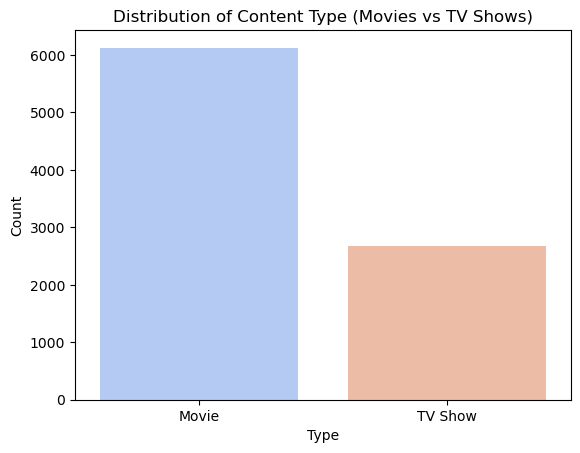

In [26]:
sns.countplot(data=df, x="type", palette="coolwarm")
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

#### Plot Overview

This count plot shows the distribution of content types available on Netflix, comparing the number of Movies and TV Shows. From the visualization, it’s clear that Movies make up a larger portion of the catalog compared to TV Shows, indicating Netflix’s stronger focus on movie content.

### 2.Top 10 countries with most content

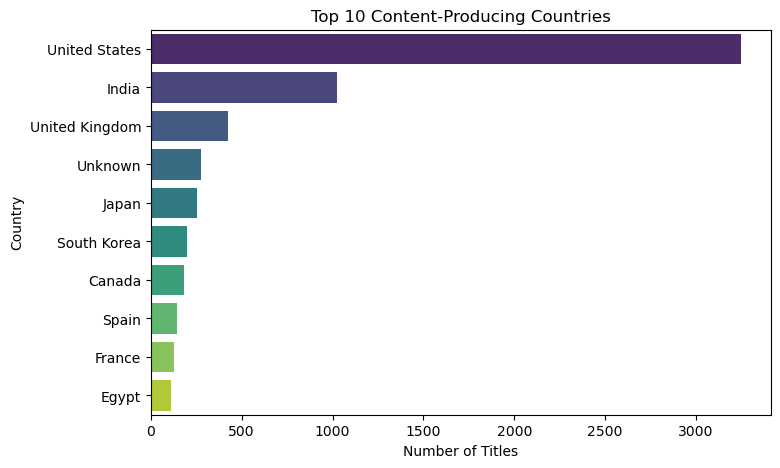

In [27]:
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

#### Plot Overview

This bar chart highlights the top 10 countries contributing the most content to Netflix. The visualization shows that the United States dominates in terms of the number of titles, followed by countries like India, the United Kingdom, and others, reflecting Netflix’s strong presence and production partnerships in these regions.

### 3.Distribution of release years

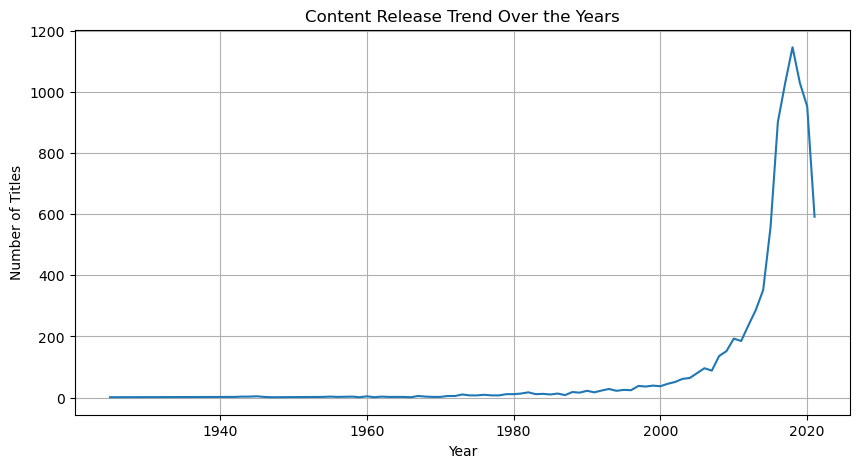

In [28]:
plt.figure(figsize=(10,5))
df["release_year"].value_counts().sort_index().plot(kind="line")
plt.title("Content Release Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

#### Plot Overview

This line chart illustrates the trend of content releases on Netflix over the years. The number of titles shows a steady rise, peaking around 2020 during the COVID-19 period, when demand for online streaming surged. This reflects Netflix’s rapid content expansion to meet the growing global audience during lockdowns.

## Bivariant

### 4.Type vs Rating

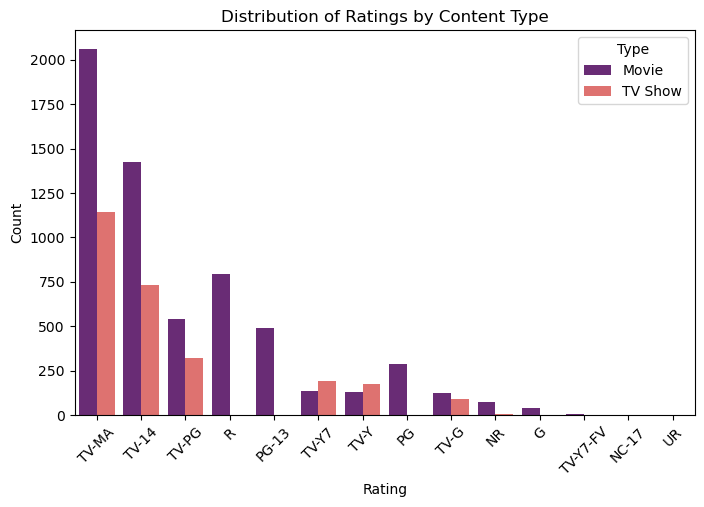

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="rating", hue="type", order=df["rating"].value_counts().index, palette="magma")
plt.title("Distribution of Ratings by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()

#### Plote Overview

This bar chart compares the distribution of content ratings across Movies and TV Shows on Netflix. It shows that most titles fall under TV-MA and TV-14, indicating that Netflix primarily offers content suited for mature and teen audiences, while content for younger viewers (like TV-G or PG) is relatively limited.

### 5.Movie Duration Distribution Over the Decades

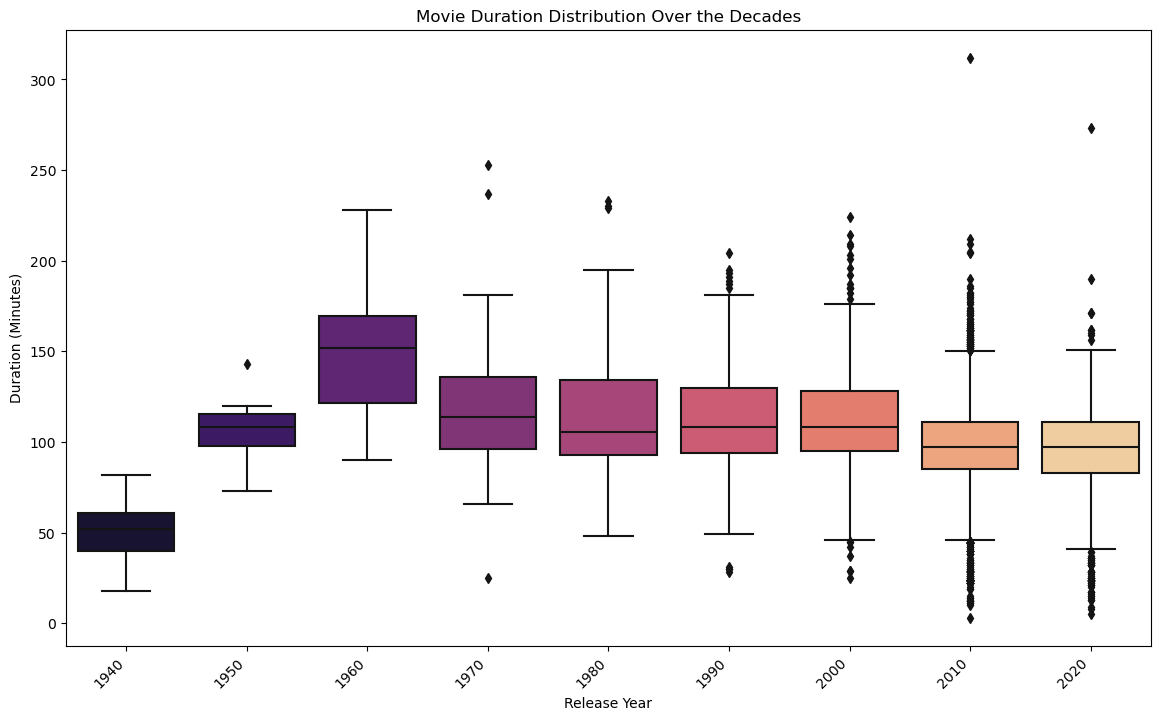

In [30]:
df_movies = df[df["type"] == "Movie"].copy()
df_movies["duration_min"] = df_movies["duration"].str.extract("(\d+)").astype(float)

plt.figure(figsize=(14,8))
sns.boxplot(data=df_movies, x="content_decade", y="duration_min", palette="magma")
plt.title("Movie Duration Distribution Over the Decades")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes)")
plt.xticks(rotation=45, ha="right")
plt.show()


#### Plot Overview

The box plot shows that movie durations have generally remained consistent across decades, with most films averaging between 90 and 120 minutes. Slight variations are observed in recent decades, indicating a trend toward shorter runtimes. A few outliers suggest the presence of exceptionally long movies in certain periods.

## Multivariant

### 6. Correlation matrix for numeric fields

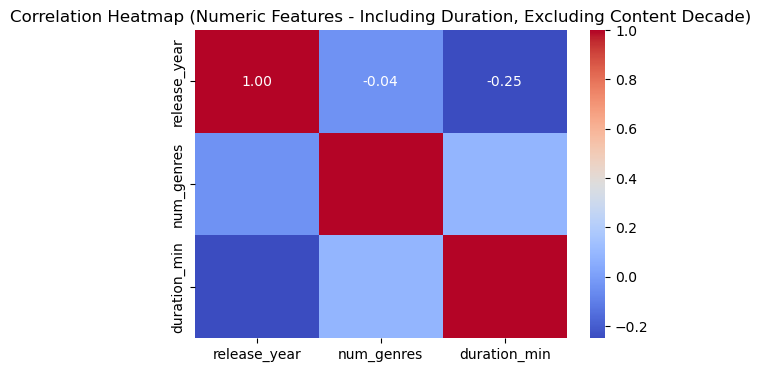

In [31]:
# Ensure 'duration_min' exists and is numeric
df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float)

# Select numeric columns except 'content_decade'
numeric_df = df.select_dtypes(include='number').drop(columns=['content_decade'], errors='ignore')

# Plot correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features - Including Duration, Excluding Content Decade)")
plt.show()

#### Plot Overview

The heatmap shows the correlation among numeric features such as release year, number of genres, and movie duration. A strong positive or negative correlation indicates a potential relationship between variables, while near-zero values suggest weak or no correlation. Overall, most features appear to be weakly correlated, indicating they contribute independently to the dataset.

### 7.Pivot table: Count of content by type and country

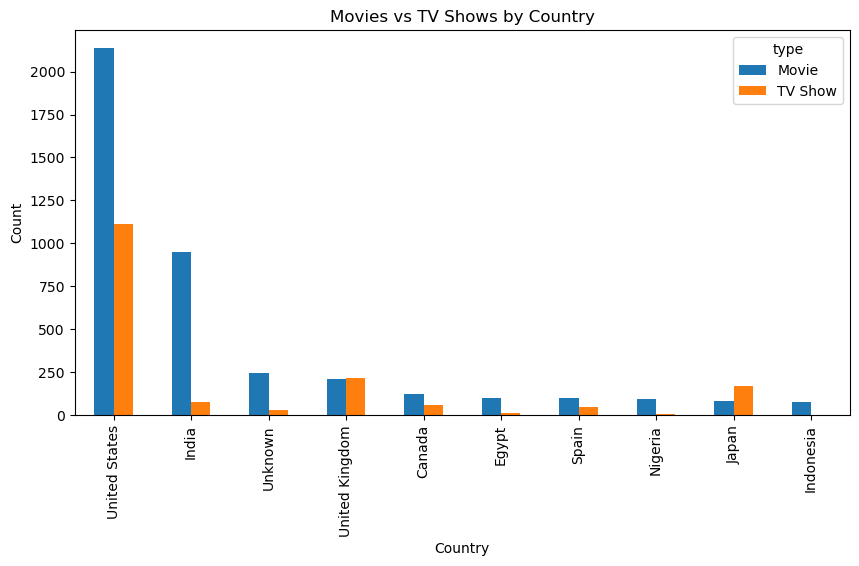

In [32]:
pivot_data = df.pivot_table(index="country", columns="type", values="show_id", aggfunc="count")
pivot_data.fillna(0, inplace=True)
pivot_data.sort_values(by="Movie", ascending=False).head(10).plot(kind="bar", figsize=(10,5))
plt.title("Movies vs TV Shows by Country")
plt.ylabel("Count")
plt.xlabel("Country")
plt.show()


#### Plot Overview

The bar chart compares the number of movies and TV shows produced by the top ten countries. It highlights that certain countries, such as the United States and India, have a significantly higher volume of Netflix content. Overall, the plot reveals regional differences in content type, with some countries focusing more on movies and others on TV shows.

## Visualizations 

## Bivariant

### 8.Histogram for show durations

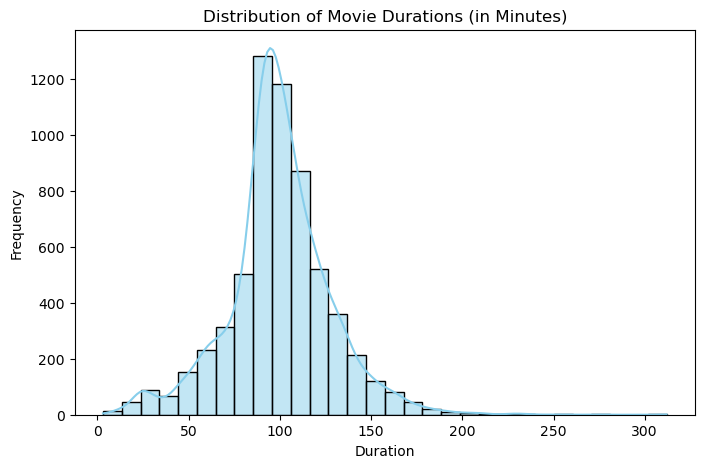

In [33]:
# Extract numeric durations
durations = df["duration"].dropna().apply(lambda x: int(x.split()[0]) if "min" in x else None)

# Plot histogram with KDE
plt.figure(figsize=(8,5))
sns.histplot(durations, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Movie Durations (in Minutes)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

#### Plot Overview

The histogram shows the distribution of movie durations (in minutes) on Netflix. Most titles cluster between 80 and 120 minutes, indicating that the majority of movies fall within a typical feature-length range. The smooth KDE curve reinforces this concentration, with fewer very short or long films. Overall, the plot suggests Netflix’s movie catalog is dominated by standard-length films, with only a small number of outliers.

### 9.Violin plot for release year by type

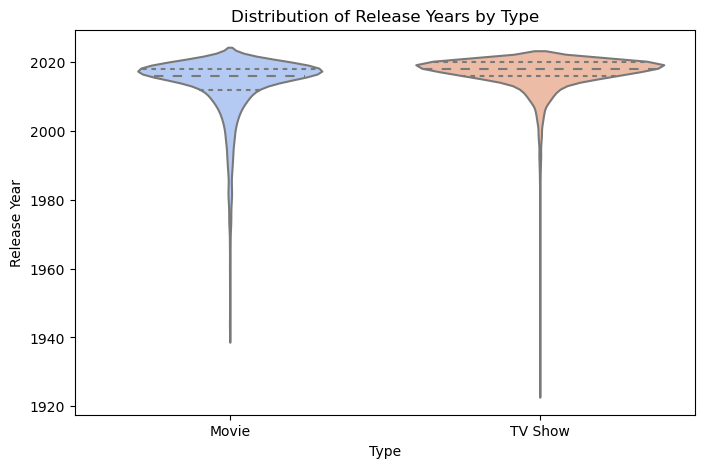

In [34]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="type", y="release_year", palette="coolwarm", inner="quartile")
plt.title("Distribution of Release Years by Type")
plt.xlabel("Type")
plt.ylabel("Release Year")
plt.show()


#### Plot Overview

The violin plot shows the distribution of release years for Movies and TV Shows. Both types are concentrated in recent years, especially after 2010, indicating Netflix’s focus on modern content. TV Shows exhibit a slightly narrower spread, while Movies show a wider range, suggesting a mix of both older and newer releases in the catalog.

### 10.Pie chart for content type


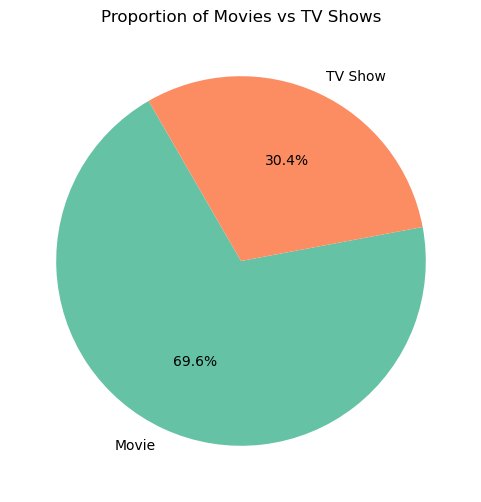

In [35]:
df["type"].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=120, colors=sns.color_palette("Set2"), figsize=(6,6)
)
plt.title("Proportion of Movies vs TV Shows")
plt.ylabel("")
plt.show()

#### Plot Overview 

The pie chart illustrates the proportion of Movies and TV Shows available on Netflix. Movies clearly make up the larger share of the catalog, while TV Shows represent a smaller portion. This suggests Netflix’s content library is more heavily focused on films, though series still form a significant part of its overall offerings.

### 11.Content Distribution by Country and Adult Rating (Top 10 Countries)

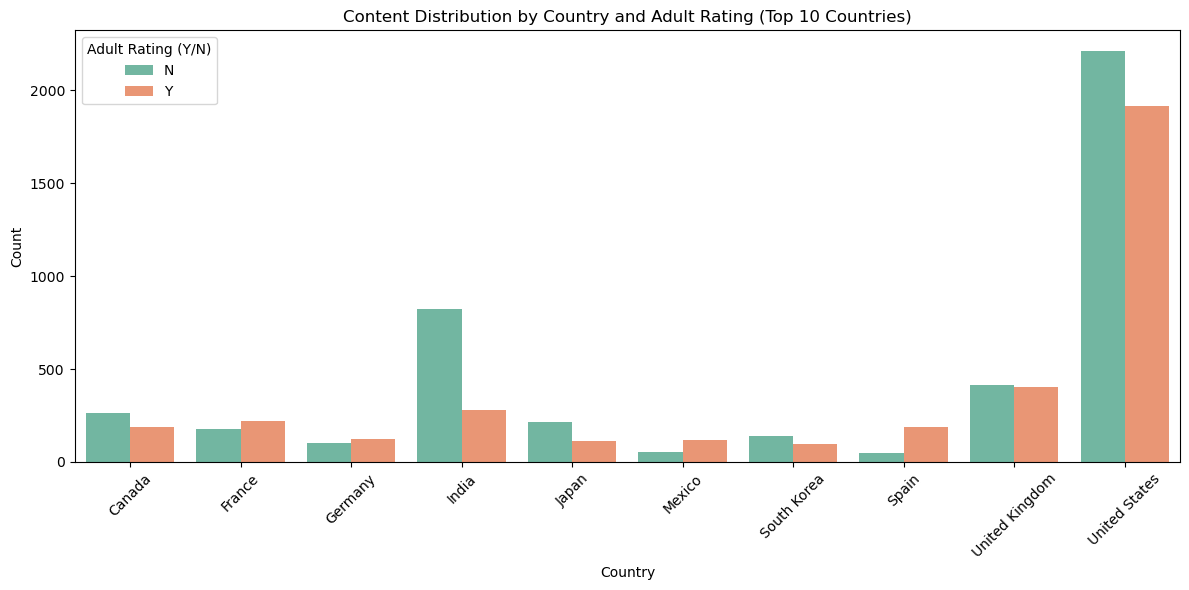

In [36]:
# Split multi-country rows into separate entries
df_exploded = df.assign(country=df['country'].str.split(',')).explode('country')
df_exploded['country'] = df_exploded['country'].str.strip()

# Remove "Unknown" countries
df_exploded = df_exploded[df_exploded['country'].str.lower() != 'unknown']

# Get top 10 countries by total count
top_countries = df_exploded['country'].value_counts().head(10).index
df_top = df_exploded[df_exploded['country'].isin(top_countries)]

# Group by country and adult flag
grouped = (
    df_top.groupby(['country', 'is_adult'])
    .size()
    .reset_index(name='count')
)

# Plot grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=grouped,
    x='country',
    y='count',
    hue='is_adult',
    palette='Set2'
)

plt.title("Content Distribution by Country and Adult Rating (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Adult Rating (Y/N)")
plt.tight_layout()
plt.show()


#### Plot Overview 

The bar chart shows how adult (Y) and non-adult (N) titles are distributed among the top 10 countries.
Most regions — such as the United States, India, and United Kingdom — have a clear dominance of non-adult content, while adult-rated titles form a smaller segment.
This pattern indicates Netflix’s catalog is largely family-friendly, with adult content being relatively limited across major markets.

### 12.Genre-wise Distribution across Top 10 Countries

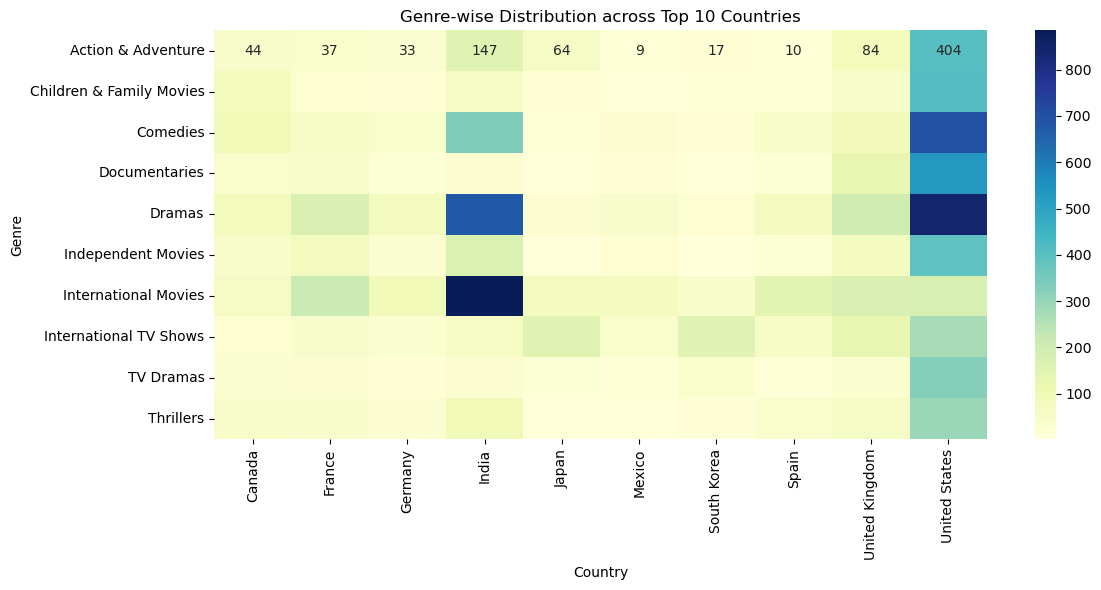

In [37]:
# Split multiple countries and genres
df_exploded = df.assign(
    country=df['country'].str.split(','),
    genre=df['listed_in'].str.split(',')
).explode('country').explode('genre')

# Clean spaces and remove unknowns
df_exploded['country'] = df_exploded['country'].str.strip()
df_exploded['genre'] = df_exploded['genre'].str.strip()
df_exploded = df_exploded[
    (df_exploded['country'].str.lower() != 'unknown') &
    (df_exploded['genre'].str.lower() != 'unknown')
]

# Get top 10 countries by total titles
top_countries = df_exploded['country'].value_counts().head(10).index
df_top = df_exploded[df_exploded['country'].isin(top_countries)]

# Group by country and genre
genre_country_count = (
    df_top.groupby(['country', 'genre'])
    .size()
    .reset_index(name='count')
)

# Get top 10 genres overall for better visualization
top_genres = genre_country_count.groupby('genre')['count'].sum().nlargest(10).index
genre_country_count = genre_country_count[genre_country_count['genre'].isin(top_genres)]

# Pivot for heatmap
pivot_table = genre_country_count.pivot(index='genre', columns='country', values='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Genre-wise Distribution across Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


#### Plot Overview

The heatmap shows the distribution of different movie and TV genres across the top 10 countries. India has the highest contribution in multiple genres, particularly in International Movies, Dramas, and Comedies, indicating a strong domestic content production. The United States also shows high counts in Dramas, Comedies, and Action & Adventure, reflecting its large entertainment industry. European countries like France, Germany, and the United Kingdom show moderate contributions, while countries like Mexico, South Korea, and Spain have relatively lower counts but stand out in specific genres such as International TV Shows for South Korea and Japan. Overall, the distribution highlights regional preferences and production strengths across genres.

# Project overview

## Conclusion & Recommendations
### Overall Findings:

Movies dominate Netflix’s catalog, but TV shows have steadily increased in recent years.

Content growth has accelerated significantly since 2015, highlighting Netflix’s push for global expansion.

United States, India, and the United Kingdom are the top content-producing countries, indicating strong partnerships and regional focus.

Drama, Comedy, and Documentaries are the most popular genres, reflecting audience demand for diverse storytelling formats.

The majority of titles are rated TV-MA or TV-14, showing Netflix’s focus on content for mature and teenage audiences.

## Recommendations & Next Steps:
Leverage audience insights: Combine this dataset with viewership data or social sentiment analysis to better understand user engagement and preferences.

Time-series forecasting: Use historical trends to predict future content needs and plan release strategies accordingly.